In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Import the necessary module from Keras
from keras.datasets import mnist

In [3]:
# Split the data into train and test
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


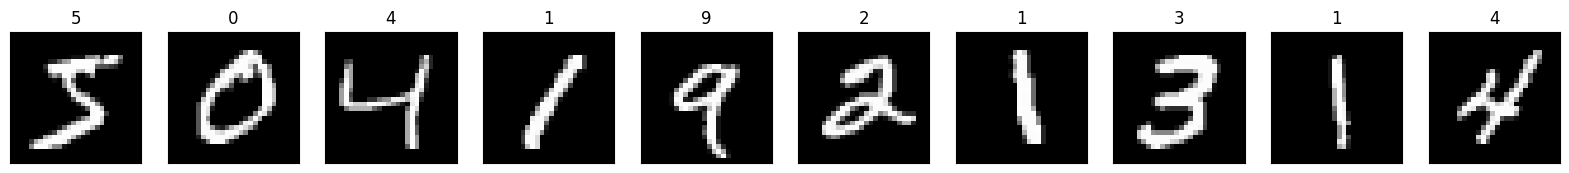

In [4]:
# Show images in mnist dataset
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
# Reshape the train and test data
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_train = x_train.astype('float32') #convert the datatype of the training to 32-bit floating point numbers
x_test = x_test.astype('float32') #convert the datatype of the testing to 32-bit floating point numbers
#normalize the pixel values to be in the range [0, 1] by dividing it by 255
x_train /= 255
x_test /= 255

num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [8]:
# Build the CNN model
model=Sequential()
#Convolution Layer with activation function Relu and kernal initializer as uniform
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
#Maxpooling Layer
model.add(MaxPooling2D((2,2)))
#Flatten Layer
model.add(Flatten())
#Dense Layer
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
#Output Layer we have 10 classes and we use softmax
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#Summarise our model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

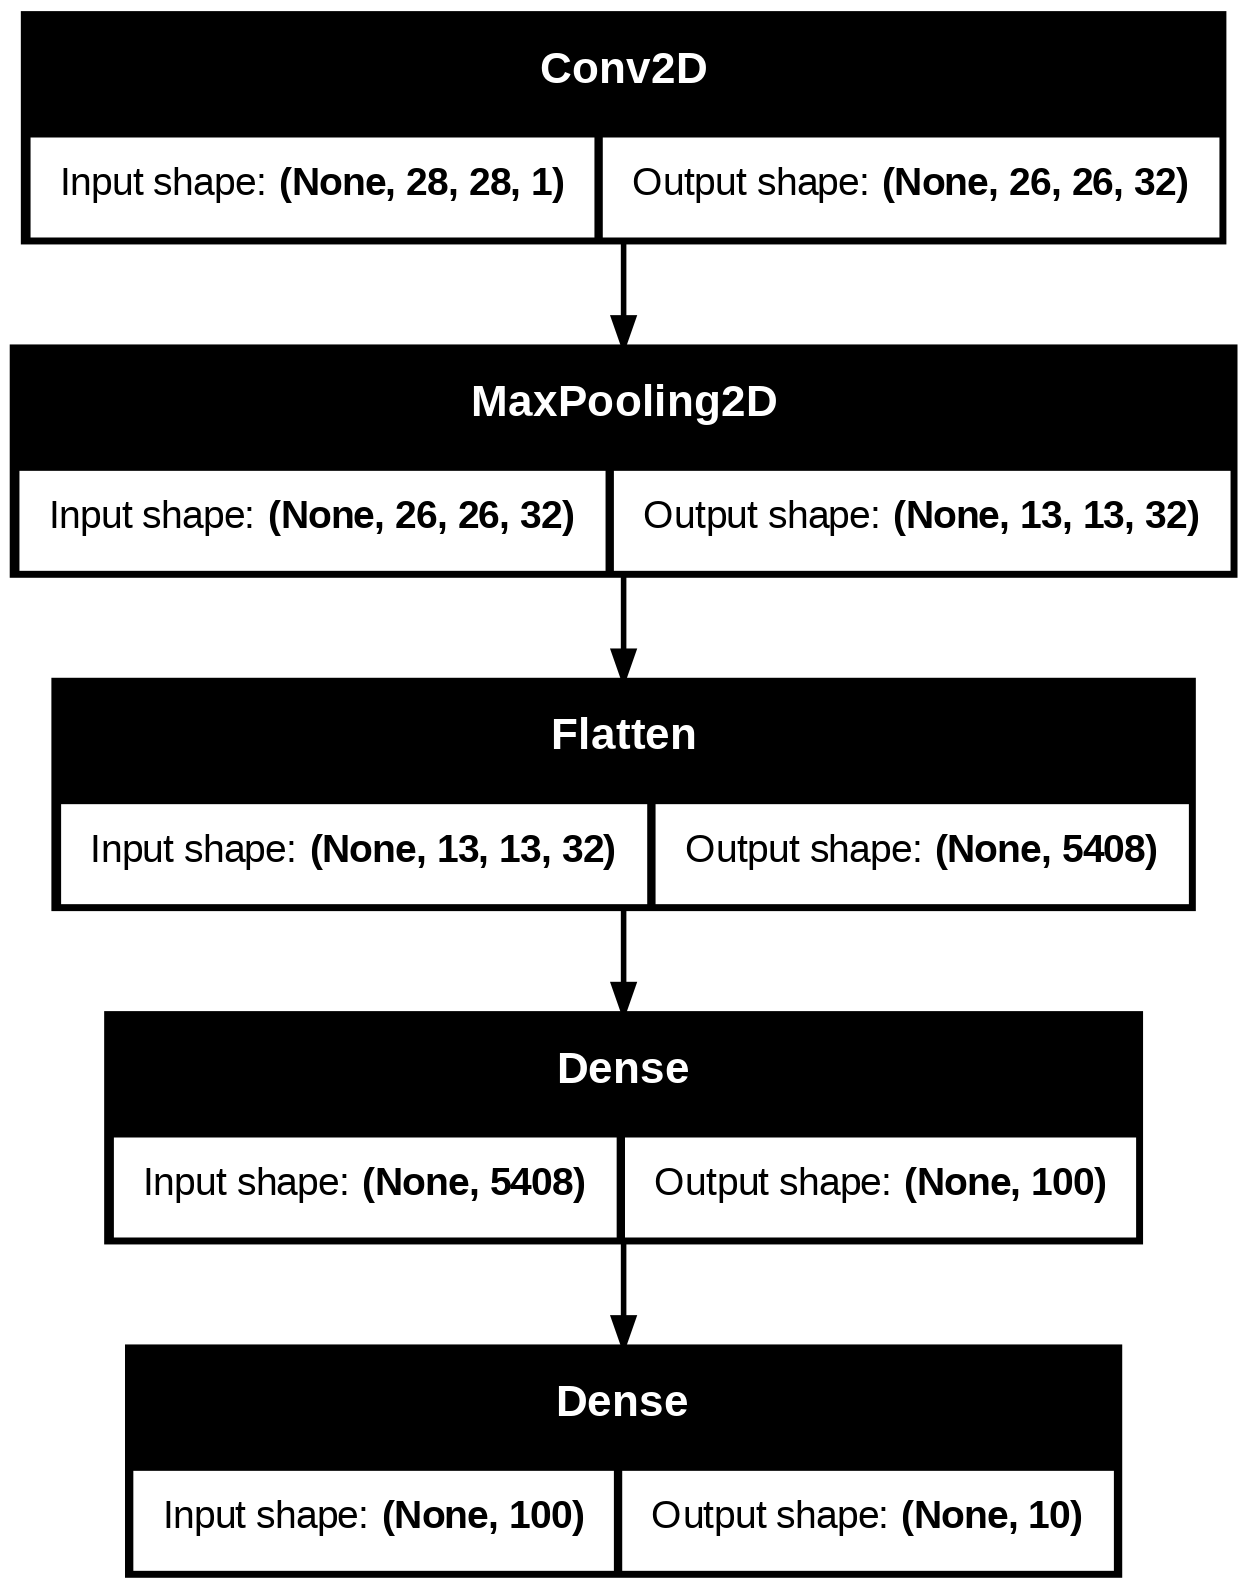

In [10]:
#visualize our model based on appropriate flow diagram
from keras import utils
utils.plot_model(model, show_shapes=True)

In [11]:
#Train the model and display training/validation accuracy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=5,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9243 - loss: 0.2452 - val_accuracy: 0.9768 - val_loss: 0.0694
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9859 - loss: 0.0465 - val_accuracy: 0.9831 - val_loss: 0.0550
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9831 - val_loss: 0.0536
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9835 - val_loss: 0.0611
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9967 - loss: 0.0112 - val_accuracy: 0.9848 - val_loss: 0.0480


In [12]:
#Save the model
model.save('mnist_cnn_Model.h5')

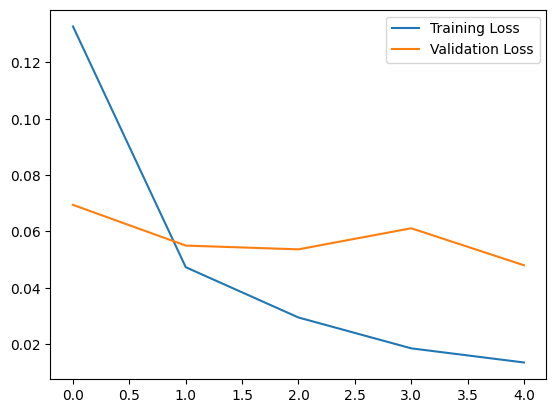

In [13]:
#Evaluate the model and plot Training and Validation loss.
plt.plot(model.history.history['loss'],label='Training Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()

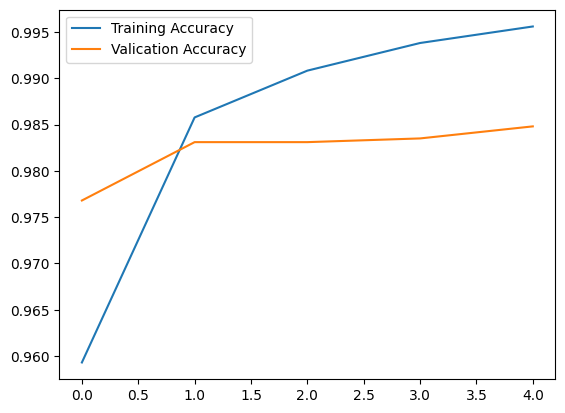

In [14]:
#Evaluate the model and plot Training and Validation Accuracy.
plt.plot(model.history.history['accuracy'],label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'],label='Valication Accuracy')
plt.legend()

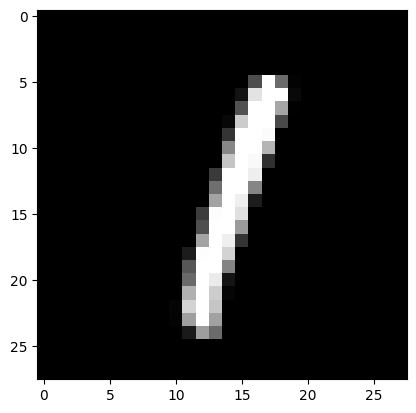

In [15]:
# Check our model will perform well
import keras #Imported Keras
model=keras.models.load_model('mnist_cnn_Model.h5') #calling our model
plt.imshow(x_test[5],cmap='gray') # Shows the image in 5th position

In [17]:
# Prediction is done using image that load from our data
x=np.reshape(x_test[5],(1,28,28,1))
np.argmax(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


np.int64(1)


Model using BatchNormalization

In [19]:
from tensorflow.keras.layers import BatchNormalization

In [20]:
# Build the CNN model with BatchNormalization
model=Sequential()
#Convolution Layer with activation function Relu and kernal initializer as uniform
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(BatchNormalization())
#Maxpooling Layer
model.add(MaxPooling2D((2,2)))
#Flatten Layer
model.add(Flatten())

model.add(BatchNormalization())
#Dense Layer
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
#Output Layer we have 10 classes and we use softmax
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
#Summarise our model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5408)           │        21,632 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 563,990 (2.15 MB)

 Trainable params: 553,110 (2.11 MB)

 Non-trainable params: 10,880 (42.50 KB)

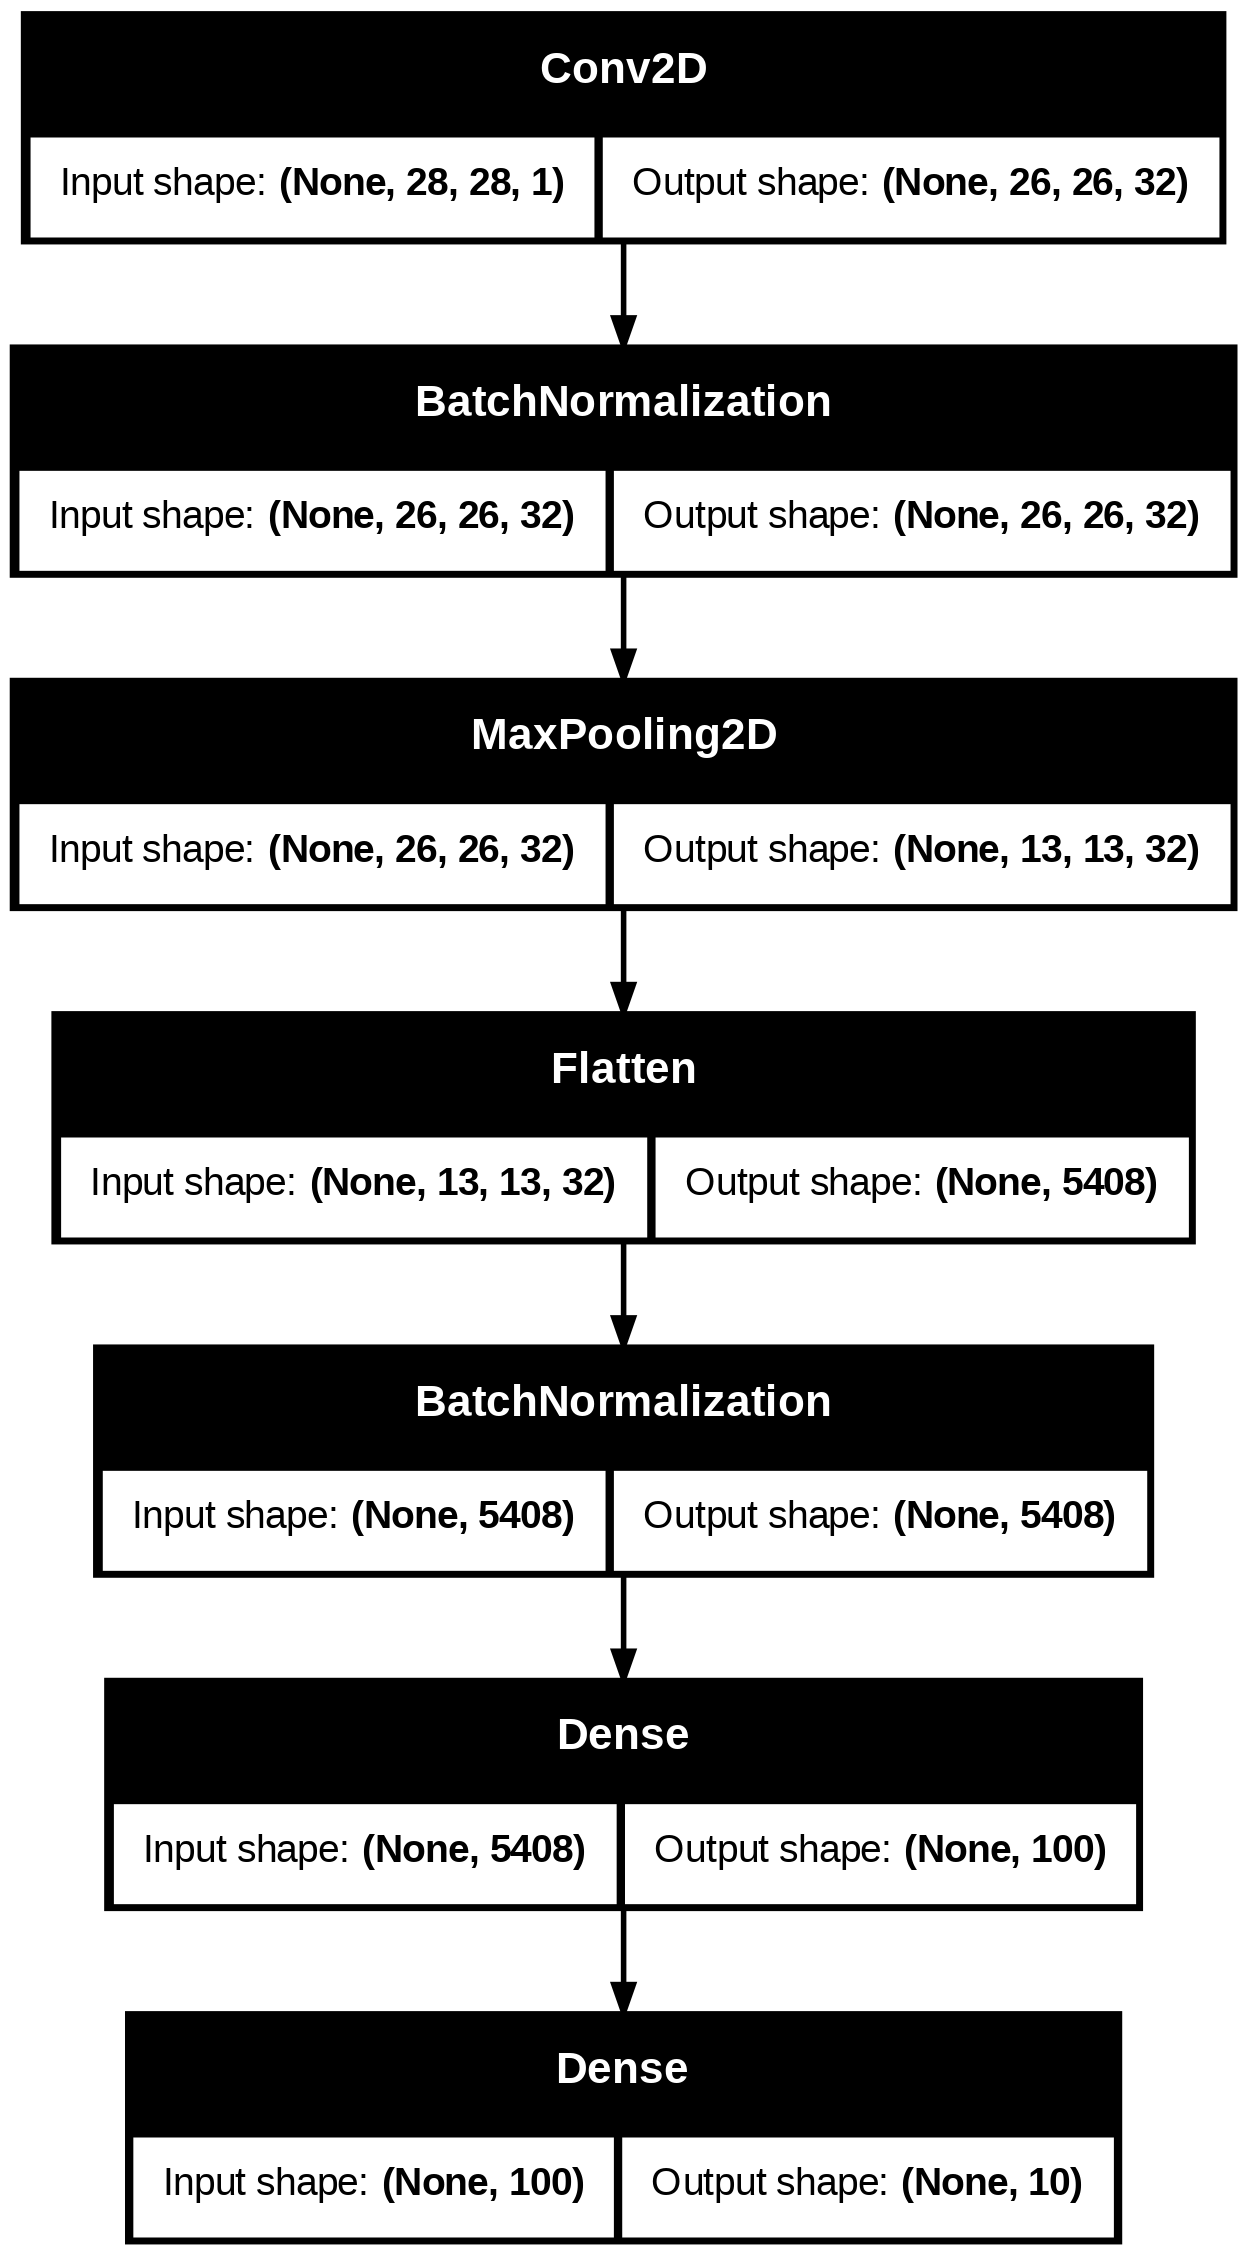

In [22]:
#visualize our model based on appropriate flow diagram
from keras import utils
utils.plot_model(model, show_shapes=True)

In [23]:
#Train the model and display training/validation accuracy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=32,epochs=5,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9175 - loss: 0.3230 - val_accuracy: 0.9740 - val_loss: 0.1322
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9799 - loss: 0.0679 - val_accuracy: 0.9678 - val_loss: 0.1535
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9863 - loss: 0.0440 - val_accuracy: 0.9750 - val_loss: 0.1358
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9907 - loss: 0.0294 - val_accuracy: 0.9764 - val_loss: 0.1396
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9913 - loss: 0.0269 - val_accuracy: 0.9745 - val_loss: 0.1665


In [25]:
#Save the model
model.save('mnist_CNN_Model.h5')

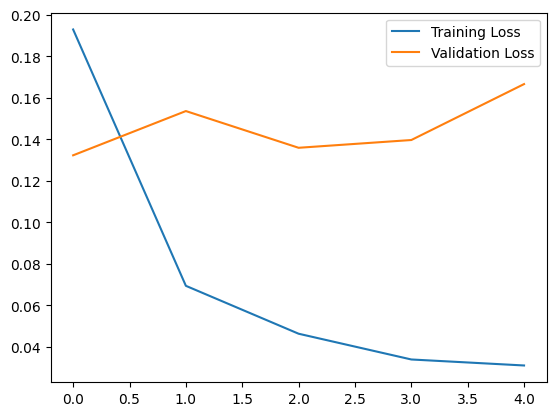

In [26]:
#Evaluate the model and plot Training and Validation loss.
plt.plot(model.history.history['loss'],label='Training Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()

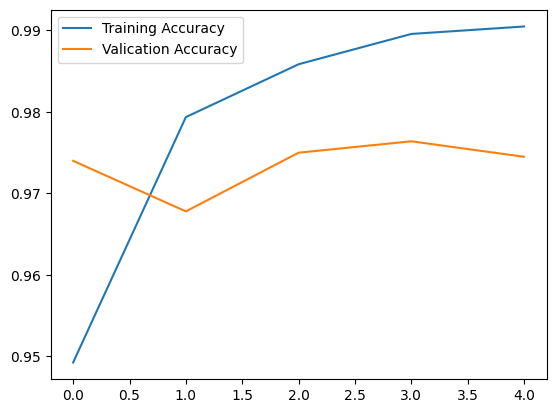

In [27]:
#Evaluate the model and plot Training and Validation Accuracy.
plt.plot(model.history.history['accuracy'],label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'],label='Valication Accuracy')
plt.legend()

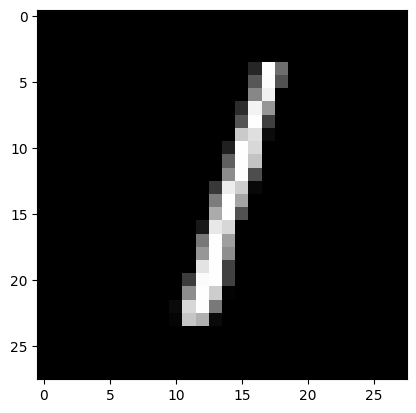

In [29]:
# Check our model will perform well
import keras #Imported Keras
model=keras.models.load_model('mnist_cnn_Model.h5') #calling our model
plt.imshow(x_test[2],cmap='gray') # Shows the image in 5th position

In [30]:
# Prediction is done using image that load from our data
x=np.reshape(x_test[2],(1,28,28,1))
np.argmax(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


np.int64(1)